In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import torch
from torchmetrics import JaccardIndex
import albumentations as A
import numpy as np
from PIL import Image
from torchvision import transforms
import random
from matplotlib import pyplot as plt
import sys  
sys.path.insert(1, '../')
from utils.dice_loss import DiceLoss
from utils.iou import IoU
sns.set(rc={'axes.facecolor':'white',"axes.edgecolor":"black","axes.grid":False,"axes.labelsize":30,"xtick.labelsize":15,"ytick.labelsize":15},font="Ubuntu")

In [2]:
df=pd.read_csv('../data/processed/GRAZ/data.tsv')

In [3]:
df['class'].value_counts().to_list()

[14, 9, 5, 4]

Text(0.5, 0, "Gland's Class")

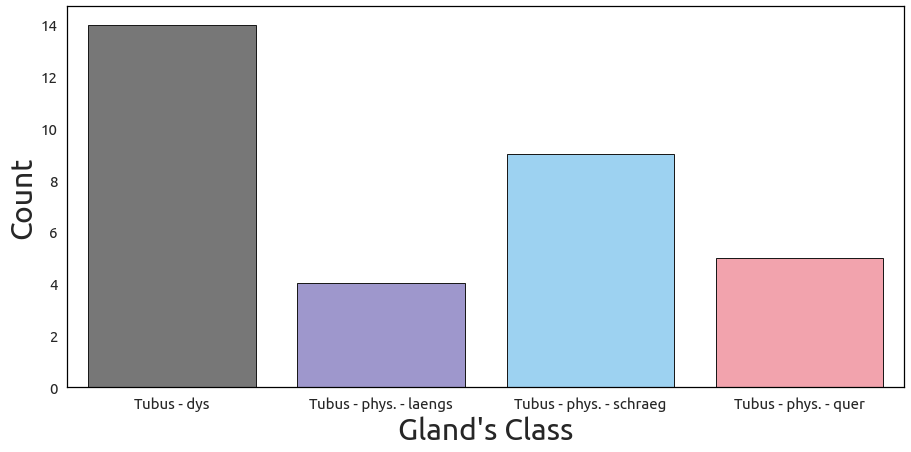

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols =1, figsize = (15, 7),facecolor='white')
sns.countplot(x="class",data=df,palette=["#777777", "#988ed5","#8FD5FF","#FF96A3"],edgecolor="k")
plt.ylabel("Count")
plt.xlabel("Gland's Class")

In [6]:
img=np.array(Image.open("../data/image/image_1.jpg"))
mask=np.array(Image.open("../data/image_mask/mask_1.jpg"))

In [17]:
preprocess_1 = transforms.Compose([
    transforms.ToTensor()
])
preprocess_2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
preprocess_3 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
img_pre_1=preprocess_1(img)

img_pre_2=preprocess_2(img)
img_pre_3=preprocess_3(img)
print(img.max(),img.min())
print(img_pre_1.max(),img_pre_1.min())
print(img_pre_2.max(),img_pre_2.min())
print(img_pre_3.max(),img_pre_3.min())



255 0
tensor(1.) tensor(0.)
tensor(2.6400) tensor(-2.1179)
tensor(1.) tensor(-1.)


In [8]:
random.seed(2022)
transform = A.Compose([A.RandomBrightnessContrast(brightness_limit=-0.25, p=1)])
transformed = transform(image=img, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']
augmented_image = Image.fromarray(transformed_image)
augmented_mask = Image.fromarray(transformed_mask)

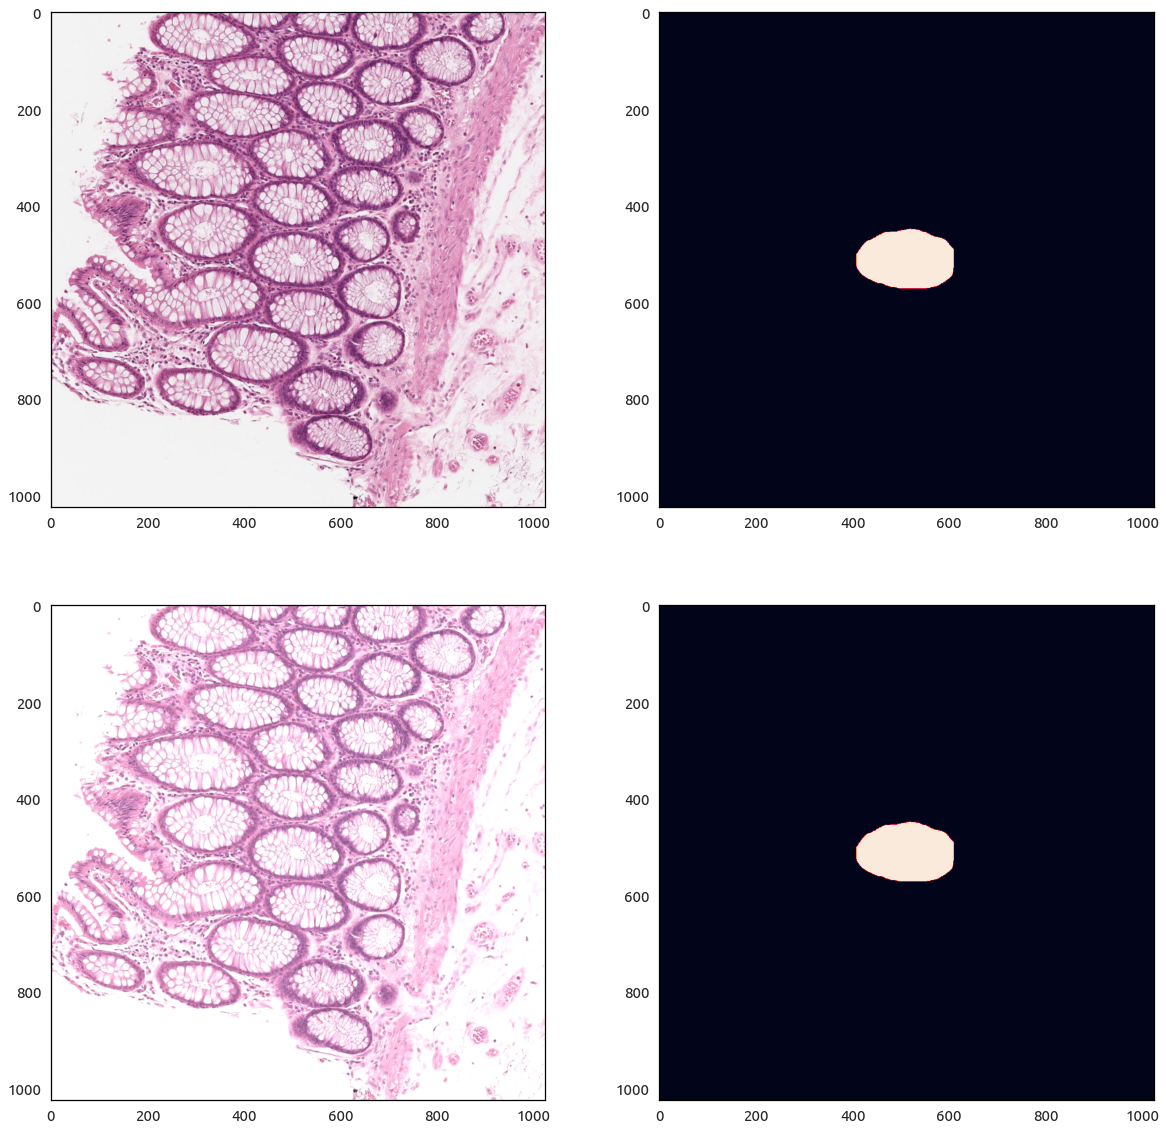

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(mask)
plt.subplot(223)
plt.imshow(augmented_image)
plt.subplot(224)
plt.imshow(augmented_mask)

In [4]:
x=torch.ones((2,3,3))
y=torch.ones((2,3,3))
loss = DiceLoss()
print((x*y).sum())
print(x.sum(),y.sum())
loss(x,y)
IoU()(x,y)

tensor(18.)
tensor(18.) tensor(18.)


tensor(1.0000)

In [16]:
inputs=y
targets=y
smooth=1e-5
intersection = (inputs * targets).sum()
print(intersection)
dice = (2.*(intersection + smooth))/(inputs.sum() + targets.sum() + smooth)

tensor(9)


In [17]:
dice

tensor(1.0000)